In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
tf.__version__

'2.9.2'

# 인공신경망(MLP)

## Sequential API

In [2]:
model = tf.keras.models.Sequential()

In [3]:
model.add(Input(shape=[2])) # 입력
model.add(Dense(units=1))   # 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [4]:
## 모델 가중치 확인, 편향 0
model.get_weights()

[array([[ 1.0234913],
        [-0.5174045]], dtype=float32), array([0.], dtype=float32)]

In [5]:
## 입력값[1,1], 가중치 합이 출력됨(편향=0 이므로)
model.predict([[1,1]])

1/1 [==============================] - 0s 475ms/step


array([[0.50608677]], dtype=float32)

## 함수형 

In [6]:
x = Input(shape=[2]) # 레이어, 2개의 입력층
output = Dense(units=1)(x) # 1개의 출력층, 입력층(x)과 연결
model = tf.keras.Model(x, output) # 모델(입력층+출력층)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.get_weights()

[array([[-0.26042235],
        [-1.202101  ]], dtype=float32), array([0.], dtype=float32)]

In [8]:
model.predict([[1,1]])

1/1 [==============================] - 0s 175ms/step


array([[-1.4625233]], dtype=float32)

In [9]:
x = Input(shape=[2])
output = Dense(units=1, activation='sigmoid')(x) # 활성화 함수(시그모이드) 적용
model = tf.keras.Model(x, output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.get_weights()

[array([[-0.25425172],
        [-0.3805014 ]], dtype=float32), array([0.], dtype=float32)]

In [11]:
model.predict([[1,0]]) # 활성화 함수 -> 양수값(0~1)으로 변환됨

1/1 [==============================] - 0s 242ms/step


array([[0.4367773]], dtype=float32)

In [12]:
model.predict([[0,1]])

1/1 [==============================] - 0s 82ms/step


array([[0.40600595]], dtype=float32)

## XOR 문제를 해결하기 위한 MLP 모델

In [13]:
import numpy as np

In [14]:
# 입력값
X = np.array([[0,0], [0,1], [1,0], [1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [15]:
# 출력값
y = np.array([0,1,1,0])
y

array([0, 1, 1, 0])

In [16]:
x = Input(2) # 노드 2개 입력층
h1 = Dense(3, activation='sigmoid')(x) # 3개 노드의 은닉층
output = Dense(1, activation='sigmoid')(h1) # 출력층+은닉층
model = tf.keras.Model(x, output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 아담 옵티마이저, 바이너리 크로스엔트로피(출력노드 1개), 정확도 지표
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# 학습(3000번)
history = model.fit(X, y, epochs=3000, verbose=0)

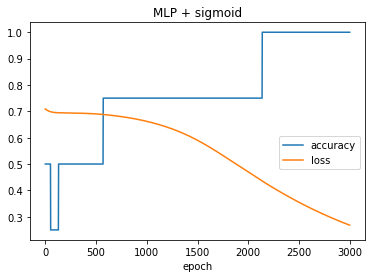

In [19]:
import matplotlib.pyplot as plt

plt.title('MLP + sigmoid')

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.legend(['accuracy', 'loss'], bbox_to_anchor=(1, 0.5))
plt.xlabel('epoch')
plt.show()

In [26]:
# 예측 결과 확인
# 0.5 기준으로 0, 1 판단

int(model.predict([[0,0]]) >= 0.5), int(model.predict([[1,0]]) >= 0.5), int(model.predict([[0,1]]) >= 0.5), int(model.predict([[1,1]]) >= 0.5)

1/1 [==============================] - 0s 41ms/step


(0, 1, 1, 0)